<a href="https://www.kaggle.com/code/aneevinay/student-scores-analysis?scriptVersionId=229356607" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction: Student Marks Analysis

Understanding student performance is crucial for identifying areas of improvement and enhancing learning outcomes. In this project, I analyze a dataset sourced from Kaggle containing academic records of 250 students, including their marks in Science, English, History, and Maths.

Through this analysis, we aim to uncover key performance trends, compare subject-wise scores, and propose strategies for academic improvement. If you find this analysis useful, please consider upvoting this notebook to support and share this work.

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [2]:
df = pd.read_csv("/kaggle/input/student-scores/student_scores.csv")
df.head()

,id,Name,Gender,Age,Section,Science,English,History,Maths
0,1,Bronnie,Female,13,C,21,81,62,49
1,2,Lemmie,Male,15,B,29,41,17,40
2,3,Danya,Female,14,C,12,87,16,96
3,4,Denna,Female,14,B,15,53,82,33
4,5,Jocelin,Male,14,A,43,6,3,21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       250 non-null    int64 
 1   Name     250 non-null    object
 2   Gender   250 non-null    object
 3   Age      250 non-null    int64 
 4   Section  250 non-null    object
 5   Science  250 non-null    int64 
 6   English  250 non-null    int64 
 7   History  250 non-null    int64 
 8   Maths    250 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 17.7+ KB


## About Dataset

The dataset consists of 250 student records with 9 columns, including demographic details (ID, Name, Gender, Age, Section) and academic scores in four subjects (Science, English, History, and Maths).

# Investigating the data

In [4]:
df.isnull().sum()

id         0
Name       0
Gender     0
Age        0
Section    0
Science    0
English    0
History    0
Maths      0
dtype: int64

> There is no missing values in the dataset

In [5]:
df.duplicated().sum()

0

> There is no duplicates in the dataset

# Data anlysis

## Descriptive Analysis

In [6]:
df.describe()

,id,Age,Science,English,History,Maths
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,125.500000,14.020000,51.440000,47.980000,52.272000,53.016000
std,72.312977,0.823598,29.314497,29.949013,26.868526,27.386416
min,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000
25%,63.250000,13.000000,25.250000,20.250000,31.000000,30.000000
50%,125.500000,14.000000,53.000000,47.500000,53.000000,52.500000
75%,187.750000,15.000000,78.000000,74.000000,76.000000,76.000000
max,250.000000,15.000000,100.000000,100.000000,100.000000,100.000000


* The average student age is 14 years (ranging from 13 to 15).

* The mean scores across subjects are:

     Science: 51.44

    English: 47.98

    History: 52.27

    Maths: 53.02

* The minimum and maximum scores range from 1 to 100 in all subjects, indicating a diverse performance distribution.

* The standard deviation suggests variation in performance, with Science and English showing slightly higher fluctuations.

## Feature Engineering - Add total and average Columns

In [7]:
df['total']=df["Science"]+df['English']+df['History']+df["Maths"]
df['average']=df['total']/4
df.head()

,id,Name,Gender,Age,Section,Science,English,History,Maths,total,average
0,1,Bronnie,Female,13,C,21,81,62,49,213,53.25
1,2,Lemmie,Male,15,B,29,41,17,40,127,31.75
2,3,Danya,Female,14,C,12,87,16,96,211,52.75
3,4,Denna,Female,14,B,15,53,82,33,183,45.75
4,5,Jocelin,Male,14,A,43,6,3,21,73,18.25


## Overall Score Distribution of students.

### summary statistics

In [8]:
df['total'].describe()

count    250.00000
mean     204.70800
std       59.75854
min       57.00000
25%      165.50000
50%      203.50000
75%      249.75000
max      361.00000
Name: total, dtype: float64

### outliers using IQR method

In [9]:
# Calculate Q1, Q3, and IQR
Q1 = df['total'].quantile(0.25)
Q3 = df['total'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('lower bound',lower_bound)
print('upper bound',upper_bound)

lower bound 39.125
upper bound 376.125


Since min = 57 and max = 361, there are no extreme outliers

### Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


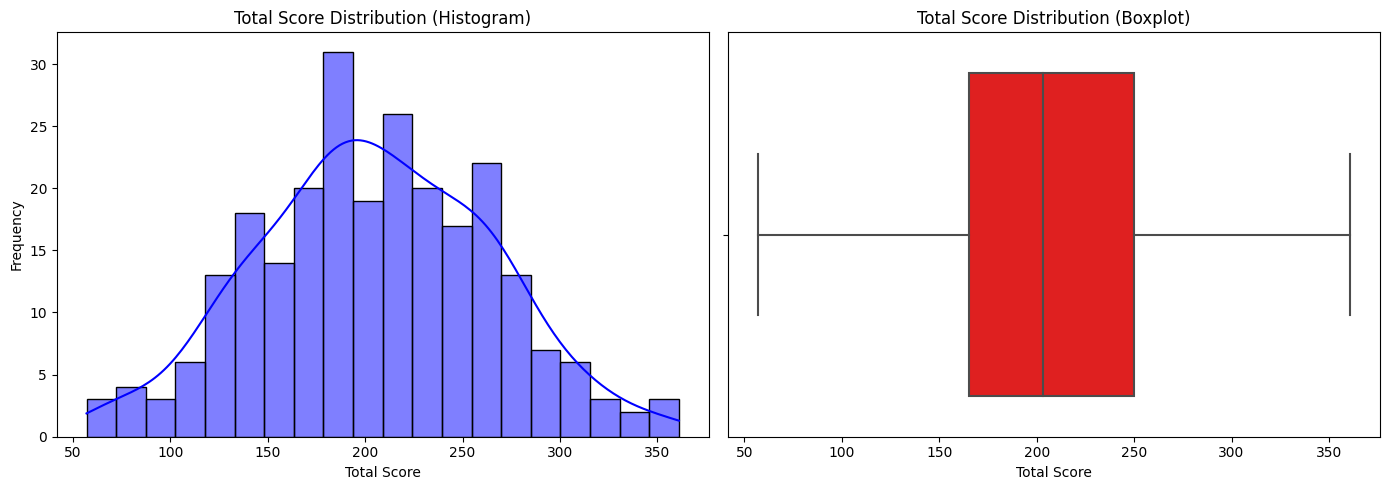

In [10]:
# Set figure size
plt.figure(figsize=(14, 5))

# First subplot - Histogram
plt.subplot(1, 2, 1)  # (rows, columns, index)
sns.histplot(df['total'], bins=20, kde=True, color='blue')
plt.title("Total Score Distribution (Histogram)")
plt.xlabel("Total Score")
plt.ylabel("Frequency")

# Second subplot - Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['total'], color='red')
plt.title("Total Score Distribution (Boxplot)")
plt.xlabel("Total Score")

# Show plots
plt.tight_layout()
plt.show()

* The distribution appears nearly normal.
  
* Student performance varies significantly, but most scores are within a reasonable range.

* No extreme outliers were detected based on the IQR method.

* The right-skewed nature suggests a few high-scoring students, but the majority performed around the mean.

## Subject-wise Performance

In [11]:
# List of subjects
subjects = ["Science", "English", "History", "Maths"]

# Generating summary statistics
subject_stats = df[subjects].describe()
subject_stats

,Science,English,History,Maths
count,250.000000,250.000000,250.000000,250.000000
mean,51.440000,47.980000,52.272000,53.016000
std,29.314497,29.949013,26.868526,27.386416
min,1.000000,1.000000,1.000000,1.000000
25%,25.250000,20.250000,31.000000,30.000000
50%,53.000000,47.500000,53.000000,52.500000
75%,78.000000,74.000000,76.000000,76.000000
max,100.000000,100.000000,100.000000,100.000000


* Maths had the highest average, suggesting students performed slightly better in it.
* English had the lowest mean and highest variation, indicating it might be the most challenging subject.
* Some students struggled significantly (scores as low as 1 in all subjects).

### Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

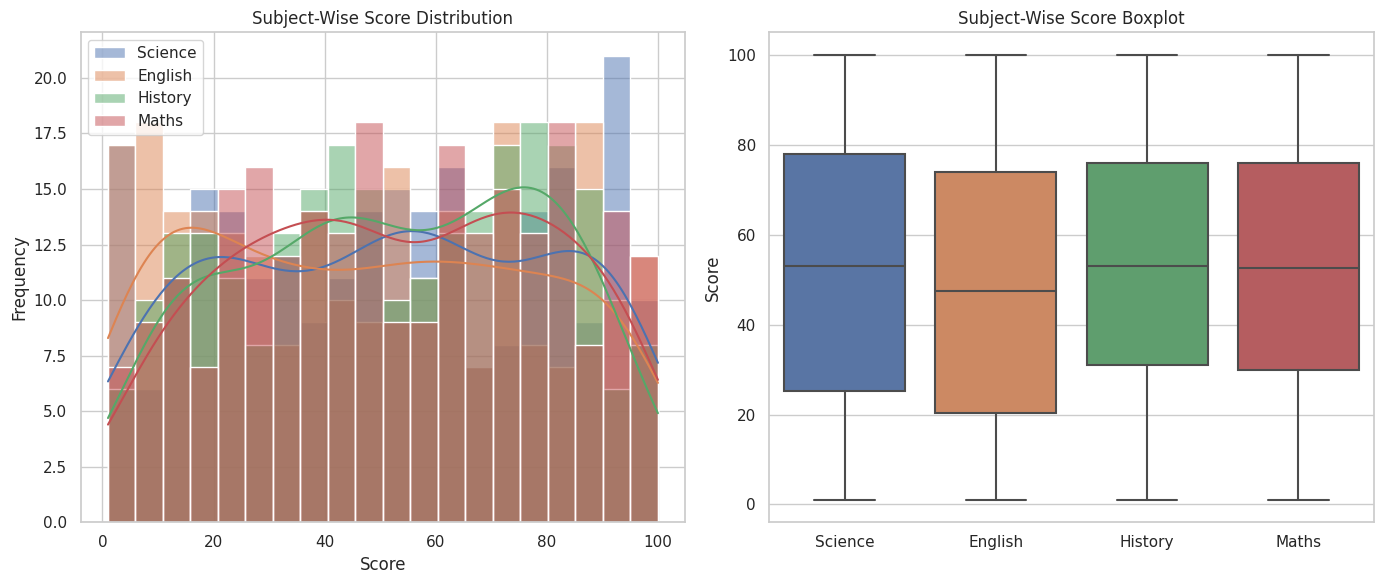

In [12]:
# Set style
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(14, 6))

# Histogram (Left Plot)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
for subject in subjects:
    sns.histplot(df[subject], bins=20, kde=True, label=subject, alpha=0.5)
plt.title("Subject-Wise Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()

# Boxplot (Right Plot)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.boxplot(data=df[subjects])
plt.title("Subject-Wise Score Boxplot")
plt.ylabel("Score")

# Show plots
plt.tight_layout()
plt.show()

#### Histogram Analysis (Left Plot)

* The distribution of all four subjects appears roughly uniform with some peaks.

* Science, English, History, and Maths have similar score distributions.

* No extreme skewness is visible, meaning scores are fairly spread across the range.

#### Boxplot Analysis (Right Plot)

* All subjects have a wide range from 0 to 100, confirming a diverse performance across students.

* The median scores (middle lines) appear close to each other, suggesting similar average performance in all subjects.

* No significant outliers, indicating no major anomalies in student scores.

## Top & Low Performers

In [13]:
# Top 5 Performers
top_performers = df.nlargest(5, 'total')[['Name', 'total']]

# Bottom 5 Performers
low_performers = df.nsmallest(5, 'total')[['Name', 'total']]

print("🔝 Top 5 Performers:\n", top_performers)
print("\n🔻 Bottom 5 Performers:\n", low_performers)

🔝 Top 5 Performers:
          Name  total
10       Dunn    361
120  Patrizia    356
68        Nil    347
91      Daffi    341
200    Ruddie    333

🔻 Bottom 5 Performers:
          Name  total
228  Ginnifer     57
19     Ashlan     67
225     Blake     70
4     Jocelin     73
137    Berget     73


### Top 5 Performers Insights:

* **Highest scorer**: Dunn with a total score of 361.

* All top performers scored above 330, showing strong consistency in all subjects.

* Their "High Performer" status suggests they excel in multiple subjects.

* **Potential reasons for success**: strong study habits, good understanding of concepts, or external support like coaching/tutoring.

### Bottom 5 Performers Insights:

* **Lowest scorer**: Ginnifer with a total score of 57.

* Other low performers have scores below 75, indicating challenges in multiple subjects.

* Their "Low Performer" status suggests difficulty in grasping concepts or lack of practice.

* **Potential reasons**: lack of motivation, study strategies, or other external challenges.

### Next Steps & Recommendations:

**For High Performers**:

* Encourage participation in competitions or advanced coursework to further challenge them.
* Identify strongest subjects to nurture specialized skills (e.g., Science Olympiads, Math contests).

**For Low Performers**:

* Conduct individual subject analysis to identify specific weak areas.
* Provide targeted support (extra classes, tutoring, or study resources).
* Implement personalized learning plans to boost performance.

✨ If you found this analysis useful, please consider upvoting this notebook. Your support helps share insights with a broader audience! 🚀